# Project Name:- Flight Price Prediction

Created by :- Atul Mishra

Dataset Link :- https://www.kaggle.com/datasets/jillanisofttech/flight-price-prediction-dataset?select=Test_set.xlsx

### Importing Libaries

In [ ]:
!pip install summarytools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from summarytools import dfSummary

### 1.1 Importing Dataset

In [107]:
data= pd.read_excel("Data_Train.xlsx")

In [108]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [109]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### 1.2 Domain Analysis

* Airline: The name of the airline company is stored in the airline column.
* Date_of_Journey: Date of journey
* Source: Flight take off from
* Destination: Flight land at
* Route: Route through flight pass
* Dep_Time: Flight's depature time
* Arrival_Time: Flight arrival time at destination
* Duration: Duration of time take from source to destination
* Total_stop: No of stops
* Addidtional_info: Any other infromation
* Price: Price of flight ticket

### 2.1 Basic Checks

In [110]:
data.shape

(10683, 11)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [112]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [113]:
data.describe(include= object)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [114]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Airline[object],1. Jet Airways2. IndiGo3. Air India4. Multiple carriers5. SpiceJet6. Vistara7. Air Asia8. GoAir9. Multiple carriers Premium econ10. Jet Airways Business11. other,"3,849 (36.0%)2,053 (19.2%)1,752 (16.4%)1,196 (11.2%)818 (7.7%)479 (4.5%)319 (3.0%)194 (1.8%)13 (0.1%)6 (0.1%)4 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAABCxJREFUeJzt3UFO3GYAhuHfCKXNZkYIiSO0d5hD9LA9xByid0CIWTRpNnSRELVNJsBgv1aZ59mxM9Kr37LlD6aHh4cBhYu1L4DzITYyYiMjNjJiIyM2MmIjIzYyYiMzjTHejzHerX0hC/r08PDwYe2LYIzL6+vr3zabzdXaF7KUw+FwN03T74Jb3+Vms7na7XYfttvtx7UvZm739/c/7/f7q9vb23djDLGt7HKMMbbb7cebm5s/176Yhbxf+wL4zAMCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRuRzj83dfa1/IEt7q7/V/dXk4HO72+/3VeKPffR0Oh7sxxqe1rwMbBEKTP5lFZc2TzYlzZlZbV1k9nZ9V1lVWT+dpzXXVm3z65TgvdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MisMngxRDlPqw1eDFHOj8/CyRi8kKlONqcYzeDFuIUxgsGLcQuPqsGLcQte6tIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZFZfPBi3MKjZPBi3MIYPgsnZPBCxgMCmbluo26TPGmWdZX1FM/x6nWV9RTPNde6ynqKJ3lAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI/PqdZX1FM81y7rKeorn8Fk4GesqMqecbE4xTvLiwYtxC6d60eDFuIXXOGXwYtzCSbzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI/OiwYtxC6/x4sGLcQun8lk4GYMXMk+dbE4xZvPDwYtxC3M6OngxbmFuTw1ejFuYjZe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5ui6ypKKuf1wXWVJxZxsEMhYV5E5drI50Zjdd9dVVlUs4Zt1lVUVSzm2rrKqYnZe6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZH5ZvBi6MJSvjt4MXRhCT4LJ2PwQua/J5sTjcX8a/Bi6MKSLh4HL7vd7sOX6F7y7yDh2b4OXr78bOjCYrzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3P0P7zA3P45eDF0YVE+Cydj8ELGAwIZsZG5mKbp12maPI2yuIsxxi9jjJ/WvhDePrdRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyF2OMP8YYf619Ibx9Bi9k3EbJiI2MwQsZgxcybqNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxGyUjNjIGL2QMXsi4jZIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsZtlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjI/A0MxbJEn7f2kAAAAABJRU5ErkJggg=="">",0(0.0%)
2,Date_of_Journey[object],1. 18/05/20192. 6/06/20193. 21/05/20194. 9/06/20195. 12/06/20196. 9/05/20197. 21/03/20198. 15/05/20199. 27/05/201910. 27/06/201911. other,"504 (4.7%)503 (4.7%)497 (4.7%)495 (4.6%)493 (4.6%)484 (4.5%)423 (4.0%)405 (3.8%)382 (3.6%)355 (3.3%)6,142 (57.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA7NJREFUeJzt3UFqGmEAhuHfIqHZKCLkMDlED9tDeBsJmUUTsrGLLFKa0U3Gt2CfZ9nZSHgZmeH/6up0Og0ofPvXH4D/h9jIiI2M2MiIjYzYyIiNjNjIiI3MaoxxP8a4O3P97XQ6vYSfhxu23u/3PzabzW7u4jRNT6vV6qfgWMJ6s9nsHh8fX7bb7eufF56fn78fDofd8Xi8G2OIjS9bjzHGdrt9fXh4+DVz/T7+PNwwDwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZmPcb72bW/L8z9G3zFepqmp8PhsBszZ9emaXoaY7z1H4tbZINAZuW/zKLizkbGuoqMdRUZ6yoyXuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrFwMgYvZNzZyBi8kDF4IWPwQsZLXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4Fk7G4IWMBwQyvkbJWFeRsa4iY11FxgMCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZBwLJ2NdRcadjYzBCxmDFzIGL2S81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELG4IWMY+FkDF7IuLORMXghY/BCxuCFjJe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjHUVGRsEMtZVZC7d2dzVWNTZdZVlFUubXVdZVnENl9ZVllUsyktdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrODF2MXruHs4MXYhaU5Fk7G4IWMOxsZgxcyBi9kDF7IeKlLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjMELGcfCyRi8kPGAQMbXKBnrKjLWVWSsq8h4QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNjXUXGuoqMY+FkrKvInLuzuauxuNnBi7EL1/Bp8GLswrWcG7wYu7A4L3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIfBq8GLtwLbODF2MXrsGxcDIGL2QuTflYjm+KceEXXliOAdG72V94YTkGRB8u/cILyzEgGl7qEhIbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkZn9hReW42/74ewvvLAcA6J3joU3HAsfBi+EPCCQERsZsZERGxmxkREbGbGRERsZsZH5DTy9TuKAyjxsAAAAAElFTkSuQmCC"">",0(0.0%)
3,Source[object],1. Delhi2. Kolkata3. Banglore4. Mumbai5. Chennai,"4,537 (42.5%)2,871 (26.9%)2,197 (20.6%)697 (6.5%)381 (3.6%)","<img src = ""data:image/png;base64, iVBORw0KG

#### Insights from basic check

* All features in the datasets are in "object" datatype, expect "Price".
* Jet Airways	have the maximum number of flights.
* Maximum flights are takeoff from delhi and land at Cochin.
* In this dataset our target is the predict price.

### 3. EDA

**Analysis of target value "Price" which is dependent on other independent variables.**

In [115]:
import plotly.express as px

### 3.1 Airline v/s Price

In [116]:
df_airlines= data.groupby('Airline')['Price'].mean().reset_index().sort_values('Price', ascending= False)

In [117]:
px.bar(x= df_airlines["Airline"], y= df_airlines["Price"], title= 'Airline v/s Price', color= df_airlines["Airline"])

#### Insights

* Jet Airways Business has highest ticket price compared to other airlines.
* remaining airlines prices are more or same.

### 3.2 Flight price

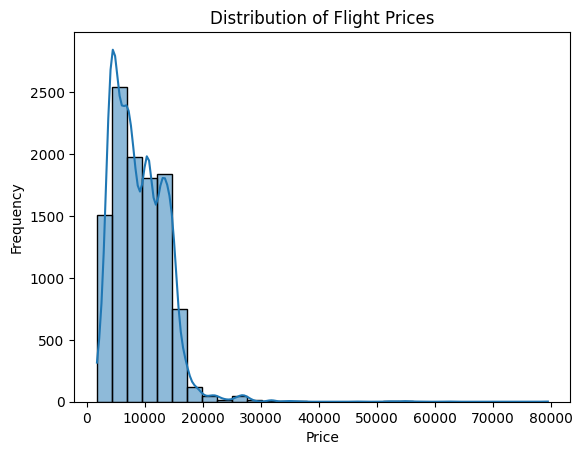

In [118]:
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Insights

* Most of the flight range are from 3500 to 15000.

### 3.3 Source City v/s Price

In [119]:
df_source = data.groupby("Source")["Price"].mean().sort_values(ascending= False).reset_index()

In [120]:
df_source

,Source,Price
0,Delhi,10539.439057
1,Kolkata,9158.389411
2,Banglore,8017.464269
3,Mumbai,5059.708752
4,Chennai,4789.892388


In [121]:
fig = px.bar(x= df_source["Source"], y= df_source["Price"], title= "Source v/s Price", color= df_source["Source"])
fig.update_layout(xaxis_title= "Source", yaxis_title= "Price")
fig.show()

### Insights

* 4537 flights are takeoff from Delhi and price is also high.
*  381 flights are takeoff from Chennai and price is low.

### 3.4 Destination v/s Price

In [122]:
df_destination = data.groupby("Destination")["Price"].mean().sort_values(ascending= False).reset_index()
df_destination

,Destination,Price
0,New Delhi,11917.716738
1,Cochin,10539.439057
2,Banglore,9158.389411
3,Delhi,5143.918577
4,Hyderabad,5059.708752
5,Kolkata,4789.892388


In [123]:
fig = px.bar(x= df_destination["Destination"], y= df_destination["Price"], title= "Destination v/s Price", color= df_destination["Destination"])
fig.update_layout(xaxis_title= "Destination", yaxis_title= "Price")
fig.show()

In [124]:
fig = px.bar(x= data["Destination"].value_counts().index, y= data["Destination"].value_counts(), title= "Number of Flights from every Destination", color= data["Destination"].value_counts().index)
fig.update_layout(xaxis_title= "Destination", yaxis_title= "Count")
fig.show()

### Insights

* The price of flights which are land at Delhi are higher.
* Maximum flights are land at Cochin.

### 3.5 Route v/s Price

In [125]:
fig = px.bar(x= data["Route"].value_counts().index, y= data["Route"].value_counts(), title= "Flights Routes", color= data["Route"].value_counts().index)
fig.update_layout(xaxis_title= "Routes", yaxis_title= "Count")
fig.show()

In [126]:
df_route = data.groupby("Route")["Price"].mean().sort_values(ascending= False).reset_index()
df_route

,Route,Price
0,BOM → DED → DEL → HYD,24115.000000
1,BOM → JDH → DEL → HYD,23867.000000
2,BOM → VNS → DEL → HYD,23528.000000
3,BOM → UDR → DEL → HYD,22950.000000
4,BOM → BDQ → DEL → HYD,22792.500000
...,...,...
123,CCU → HYD → BLR,4910.018868
124,MAA → CCU,4789.892388
125,CCU → BLR,4556.055249
126,BOM → NDC → HYD,4140.000000


In [127]:
fig = px.bar(x= df_route["Route"], y= df_route["Price"], title= "Route v/s Price", color= df_route["Route"])
fig.update_layout(xaxis_title= "Route", yaxis_title= "Price")
fig.show()

### Insights

* Maximum flights are gone through Delhi-Bombay-Cocin.
* Price of route is high for BOM --> DED --> DEL --> HYD.

### 3.5.1 Duration v/s route & Price

In [128]:
'''Converting the duration(e.g., '2h 50m') to minutes.'''

def convert_duration_to_minutes(duration_str):
    hours = 0
    minutes = 0
    parts = duration_str.split()
    for part in parts:
        if 'h' in part:
            hours = int(part[:-1])
        elif 'm' in part:
            minutes = int(part[:-1])
    return hours * 60 + minutes

# Apply the function to the 'Duration' column and create a new 'Duration_mins' column
data['Duration_mins'] = data['Duration'].apply(convert_duration_to_minutes)

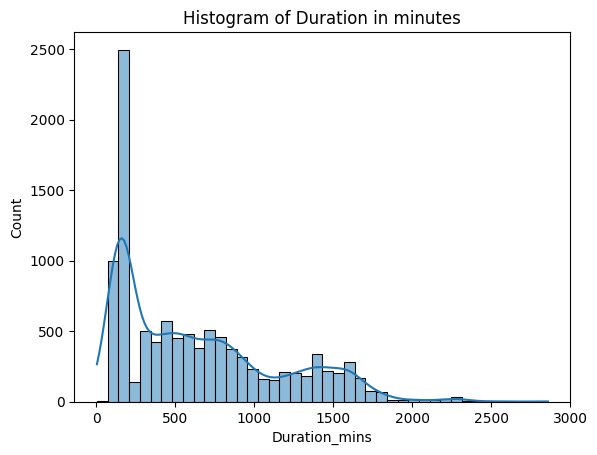

In [129]:
#plt.figure(figsize=(6,6))
sns.histplot(data['Duration_mins'], kde=True)
plt.title('Histogram of Duration in minutes');

### 3.5.2 Analysing the time taken by every Route

In [130]:
fig_duration = data.groupby("Route")["Duration_mins"].mean().sort_values(ascending= False).reset_index()
fig_duration

,Route,Duration_mins
0,DEL → RPR → NAG → BOM → COK,2116.470588
1,CCU → BBI → IXR → DEL → BLR,2115.000000
2,CCU → IXB → DEL → BLR,2000.000000
3,CCU → IXZ → MAA → BLR,1975.000000
4,BLR → BOM → UDR → DEL,1941.666667
...,...,...
123,DEL → COK,187.887324
124,BLR → DEL,171.221005
125,CCU → BLR,152.866022
126,MAA → CCU,139.619423


In [131]:
fig = px.bar(x= fig_duration["Route"], y= fig_duration["Duration_mins"], title= "Durations of every routes")
fig.update_layout(xaxis_title= "Route", yaxis_title= "Duration")
fig.show()

In [132]:
"""Counting the number of routes"""
def count_routes(route_str):
    # Check if the value is a string before splitting
    if isinstance(route_str, str):
        return len(route_str.split('→'))
    # Return 1 if the value is not a string (e.g., float)
    else:
        return 1  # or any other appropriate value for non-string routes

# Apply the function to the 'Route' column and create a new column 'Route_Count'
data['Route_Count'] = data['Route'].apply(count_routes)

# Print some examples
print(data[['Route', 'Route_Count']].head())

# Calculate total number of routes
total_routes = data['Route_Count'].sum()
print(f"\nTotal number of routes: {total_routes}")

                   Route  Route_Count
0              BLR → DEL            2
1  CCU → IXR → BBI → BLR            4
2  DEL → LKO → BOM → COK            4
3        CCU → NAG → BLR            3
4        BLR → NAG → DEL            3

Total number of routes: 30169


In [133]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_mins,Route_Count
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,2
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,4
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140,4
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325,3
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,150,2
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,155,2
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,180,2
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,160,2


In [134]:
#df_duration = data.groupby("Duration_mins")[["Price"],["Route"]].mean().sort_values(ascending= False).reset_index()
df_duration = data.groupby("Route_Count")[["Price", "Duration_mins"]].mean().sort_values(by=['Price', 'Duration_mins'],ascending=False).reset_index()

In [135]:
df_duration

,Route_Count,Price,Duration_mins
0,6,17686.000000,1770.000000
1,5,13112.000000,1547.444444
2,4,12715.807895,1233.539474
3,3,10594.123556,781.940444
4,1,7480.000000,1420.000000
5,2,5024.900315,150.084503


In [136]:
fig = px.bar(y= df_duration["Price"], x= df_duration["Route_Count"] , title= "Route_Count v/s Price")
fig.update_layout(xaxis_title= "Route_Count", yaxis_title= "Price")
fig.show()

In [137]:
fig = px.bar(y= df_duration["Duration_mins"], x= df_duration["Route_Count"] , title= "Duration_mins v/s Route_Count")
fig.update_layout(xaxis_title= "Route_Count", yaxis_title= "Duration_mins")

### Insights

* The route DEL → RPR → NAG → BOM → COK takes the longest time to reach the destination among all routes analyzed.

* There is a positive correlation between the number of stops on a route and the price of the flight ticket; as the number of stops increases, the price tends to increase as well.

* Similarly, the duration of the flight also tends to increase with the number of stops. However, there are some non-stop flights that have long durations, which could be attributed to the greater distance these flights cover.

### 3.7 Airline v/s Route Count

In [138]:
df_route_count = data.groupby("Airline")["Route_Count"].apply(lambda x: x.mode()[0]).sort_values(ascending=False).reset_index()

In [139]:
fig = px.bar(x= df_route_count["Airline"], y= df_route_count["Route_Count"], title= "Airline v/s Route Count", color= df_route_count["Airline"])
fig.update_layout(xaxis_title= "Airline", yaxis_title= "Route Count")
fig.show()


In [140]:
data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

### Insights

* Most flights operated by AirIndia Airlines have 4 routes.

* Most flights operated by GoAir, Jet Airways, Jet Airways Business, Multiple Carriers, Multiple Carriers Premium Economy, and TruJet have 3 routes.

* Most flights operated by the remaining airlines take 2 routes.

### 3.8 Total_stops V/s Price

In [141]:
df_stops_count = data.groupby("Total_Stops")["Price"].median().sort_values(ascending=False).reset_index()

In [142]:
fig= px.bar(x= df_stops_count["Total_Stops"], y= df_stops_count["Price"], title= "Total_Stops v/s Price", color= df_stops_count["Total_Stops"])
fig.update_layout(xaxis_title= "Total_Stops", yaxis_title= "Price")
fig.show()

### Insights

* As the number of stops increases, the prices of flights also increase.

* This pattern highlights that flights with multiple stops tend to be more expensive due to additional costs like landing fees, fuel consumption, and possibly increased demand for certain routes.

### 3.9 Month v/s Price

In [143]:
""" Extract month from 'Date_of_Journey' column"""
data['Journey_Month'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.month

# Now 'data' DataFrame has a new column 'Journey_Month' containing the extracted month.

In [144]:
df= data.copy()

In [145]:
df["Journey_Month"]= df["Journey_Month"].map({3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"})


In [146]:
df_month = df.groupby("Journey_Month")["Price"].mean().sort_values(ascending= False).reset_index()

In [147]:
import plotly.express as px
fig= px.bar(x= df_month["Journey_Month"], y= df_month["Price"], title= "Month v/s Price", color= df_month["Journey_Month"])
fig.update_layout(xaxis_title= "Month", yaxis_title= "Price")
fig.show()

<Axes: xlabel='Journey_Month', ylabel='count'>

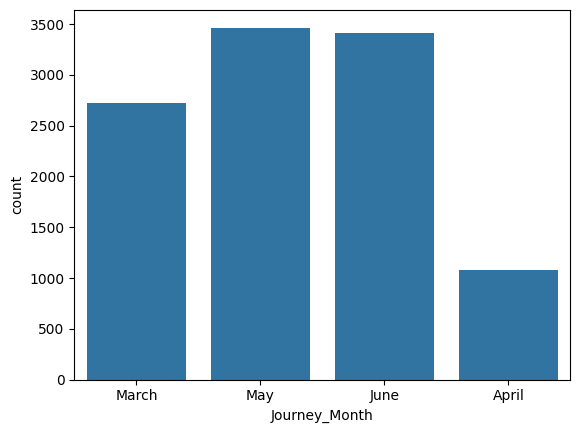

In [148]:
#frequency of Journey_Month in dataset
sns.countplot(x=df['Journey_Month'])

### Insights

* **Flight Ticket Prices in March**: The price of flight tickets is highest in the month of March.

* **Flight Ticket Prices in April**: The price of flight tickets is lowest in the month of April.

* **Prices and Number of Flights in May and June**: In the months of May and June, both the price of flight tickets and the number of flights remain relatively consistent.

### 4. Data Preprocessing

### 4.1 Hadling Nan Values

In [149]:
data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [150]:
""" Removing Nan Values"""
data= data.dropna()

In [151]:
df= data.copy()

In [152]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_mins,Route_Count,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,2,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,4,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140,4,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325,3,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,150,2,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,155,2,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,180,2,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,160,2,3


### 4.2 Removing Duplicates

In [153]:
df.duplicated().sum()

220

In [154]:
df.drop_duplicates(inplace= True)

### 4.3 Features Extraction

#### 4.3.1 Extracting features from Column "Airlines"

In [155]:
"Converting all airlines in 3 categories"
condlist = [df["Airline"].str.contains("Premium economy"), df['Airline'].str.contains("Business")]
choice_list= ["Preimum economy", "Business"]

df["Airline"]= np.select(condlist, choice_list, default= "Economy")
df["Airline"].value_counts()

,count
Airline,
Economy,10440
Preimum economy,16
Business,6


#### 4.3.2 Extracting feature from Column "Date_of_Journey"

"""Column 'Date_of_Journey' is a column with date, however, it is found as a string. We can see that all records are in the year 2019, so we will extract the month and day and then delete the 'Date_of_Journey' column."""

In [156]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [157]:
df['Month_of_Journey'] = df['Date_of_Journey'].dt.month
df['Day_of_Journey'] = df['Date_of_Journey'].dt.day

#### 4.3.3 Extracting features from column "Dep_Time" and "Arrival_Time"

In [158]:
# Transform Dep_Time to datetime
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')

# Extract the Hour, Minute and the time from the Column
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.time

# Transform Arrival_Time to datetime
df['Arrival_Time'] = [x[0] for x in df['Arrival_Time'].str.split(' ')]
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'] , format='%H:%M')

# Extract the Hour, Minute and the time from the Column
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M').dt.time

In [159]:
dep_time = df[['Dep_Time']].describe()
arrival_time = df[['Arrival_Time']].describe()

pd.merge(dep_time, arrival_time, left_index=True, right_index=True)

,Dep_Time,Arrival_Time
count,10462,10462
unique,222,223
top,18:55:00,19:00:00
freq,233,590


In [160]:
# List used to distingsh dawn, morning, afternon and night
time = pd.to_datetime(pd.Series(['05:00', '12:00', '18:00'])).dt.time

# Condition on the Dep_Time
condlist_dep = [df.Dep_Time < time[0],
                df.Dep_Time < time[1],
                df.Dep_Time < time[2]]

# Condition on the Arrival_Time
condlist_arv = [df.Arrival_Time < time[0],
                df.Arrival_Time < time[1],
                df.Arrival_Time < time[2]]

# List of choices
choicelist = ['Dawn', 'Morning', 'Afternoon']

# Transform from time to categorical data the columns Dep and Arrival time.
df['Dep_Time'] = np.select(condlist_dep, choicelist, default='Night')
df['Arrival_Time'] = np.select(condlist_arv, choicelist, default='Night')

In [161]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_mins,Route_Count,Journey_Month,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,Economy,2019-03-24,Banglore,New Delhi,BLR → DEL,Night,Dawn,2h 50m,non-stop,No info,3897,170,2,3,3,24,22,20,1,10
1,Economy,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,7h 25m,2 stops,No info,7662,445,4,5,5,1,5,50,13,15
2,Economy,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Dawn,19h,2 stops,No info,13882,1140,4,6,6,9,9,25,4,25
3,Economy,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,Night,Night,5h 25m,1 stop,No info,6218,325,3,5,5,12,18,5,23,30
4,Economy,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,Afternoon,Night,4h 45m,1 stop,No info,13302,285,3,3,3,1,16,50,21,35


### 4.2 Encoding

In [162]:
# importing label encoding
from sklearn.preprocessing import LabelEncoder

In [163]:
df['Destination'] = df['Destination'].map({'New Delhi':3,
                                           'Banglore':5,
                                           'Cochin':6,
                                           'Kolkata':1,
                                           'Delhi':4,
                                           'Hyderabad':2,
                                           })

In [164]:
df['Source'] = df['Source'].map({'Banglore':3,
                                 'Kolkata':4,
                                 'Delhi':5,
                                 'Chennai':1,
                                 'Mumbai':2,
                                 })

In [165]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,
                                           '1 stop':1,
                                           '2 stops':2,
                                           '3 stops':3,
                                           '4 stops':4,
                                           })

In [166]:
data['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8344
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [167]:
df['Additional_Info'] = df['Additional_Info'].str.lower()

In [168]:
lb=LabelEncoder()
df["Additional_Info"]=lb.fit_transform(df["Additional_Info"])

In [169]:
df["Airline"]= df["Airline"].map({"Economy":1, "Business":2, "Preimum economy":3})

In [170]:
df['Dep_Time']= df["Dep_Time"].map({"Dawn":4, "Morning":1, "Afternoon":3, "Night":2})
df['Arrival_Time']= df["Arrival_Time"].map({"Dawn":4, "Morning":2, "Afternoon":3, "Night":1})

### **5. Feature Selection**

In [171]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_mins,Route_Count,Journey_Month,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,1,2019-03-24,3,3,BLR → DEL,2,4,2h 50m,0,7,3897,170,2,3,3,24,22,20,1,10
1,1,2019-05-01,4,5,CCU → IXR → BBI → BLR,1,3,7h 25m,2,7,7662,445,4,5,5,1,5,50,13,15
2,1,2019-06-09,5,6,DEL → LKO → BOM → COK,1,4,19h,2,7,13882,1140,4,6,6,9,9,25,4,25
3,1,2019-05-12,4,5,CCU → NAG → BLR,2,1,5h 25m,1,7,6218,325,3,5,5,12,18,5,23,30
4,1,2019-03-01,3,3,BLR → NAG → DEL,3,1,4h 45m,1,7,13302,285,3,3,3,1,16,50,21,35


In [172]:
""" Removing some Features"""
df= df.drop(["Date_of_Journey", "Route", "Duration"], axis=1)

In [173]:
data= df.copy()

<Axes: >

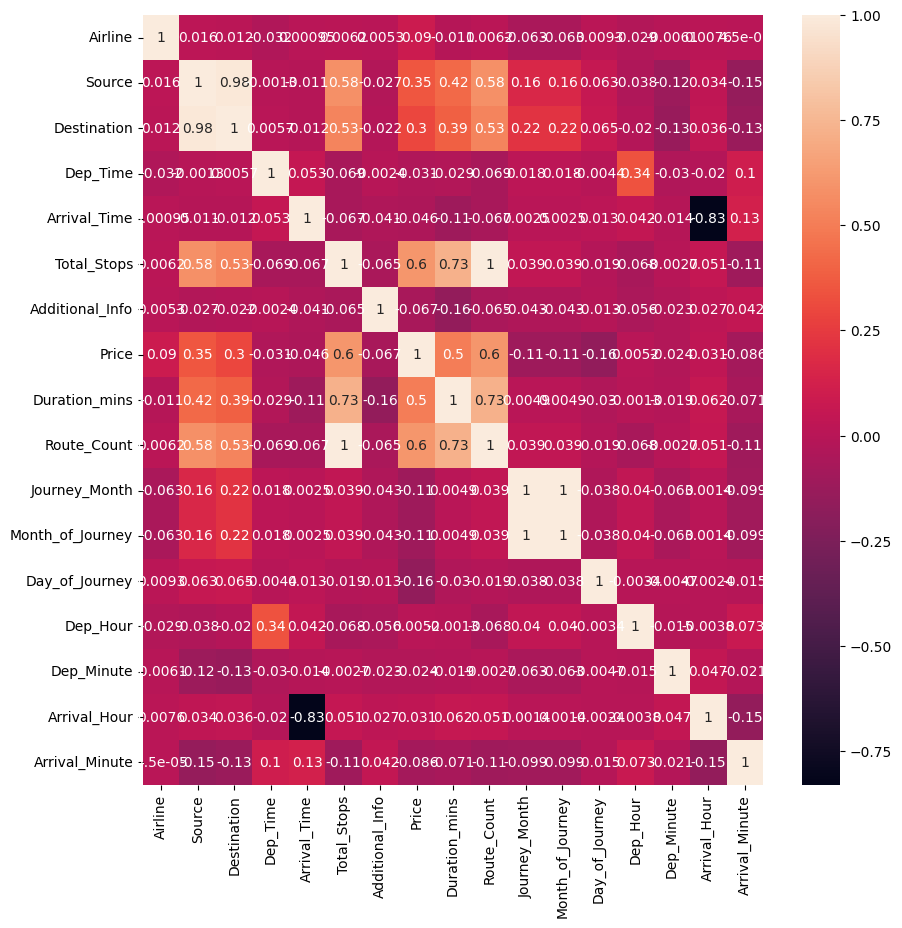

In [174]:
"""Measuring Corelation using heatmap"""
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)


### **Insight**

### **In the corelation matrix we get to know that there is a high corelation between these variables:-**

* "Destination" And "Source"
* "Month_of_journey" and "Journey_month"

### **Thus removing the one feature.**

In [175]:
""" Removing "Destination" from the data"""
data= data.drop("Destination", axis=1)
data= data.drop("Month_of_Journey", axis=1)

In [177]:
data.columns

Index(['Airline', 'Source', 'Dep_Time', 'Arrival_Time', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration_mins', 'Route_Count',
       'Journey_Month', 'Day_of_Journey', 'Dep_Hour', 'Dep_Minute',
       'Arrival_Hour', 'Arrival_Minute'],
      dtype='object')

### 6. Outlier Detection

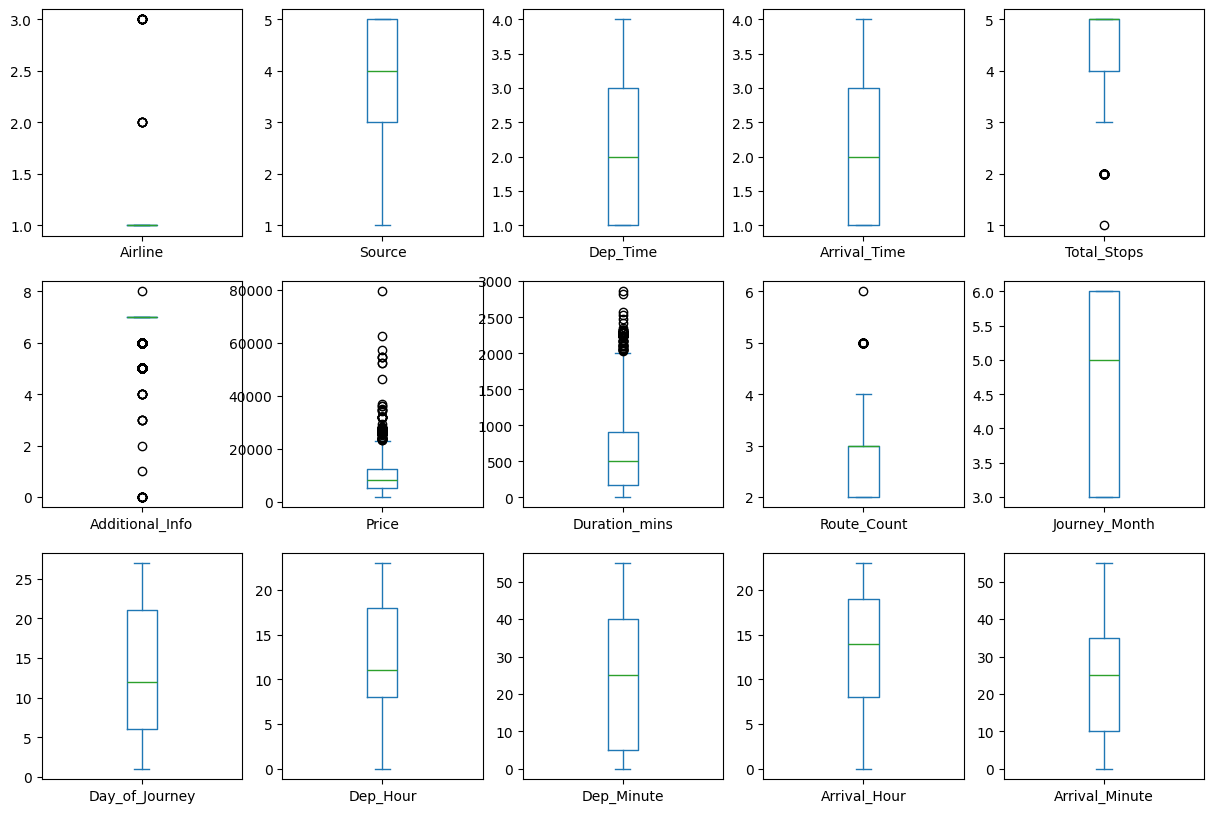

In [ ]:
data.plot(kind='box',subplots=True,layout=(3,5),figsize=(15,10))
plt.show()

In [180]:
for x in ['Price', 'Duration_mins']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25


    upper_whisker = q75+(1.5*intr_qr)
    lower_whisker = q25-(1.5*intr_qr)

    #df.loc[df[x] < lower_whisker,x] = lower_whisker
    #df.loc[df[x] > upper_whisker,x] = upper_whisker

    df.loc[df[x] < lower_whisker,x] = np.nan
    df.loc[df[x] > upper_whisker,x] = np.nan

In [181]:
df.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Dep_Time,0
Arrival_Time,0
Total_Stops,0
Additional_Info,0
Price,94
Duration_mins,75
Route_Count,0


In [182]:
df = df.dropna(axis = 0)

### 7. Preprocessing for Test data

In [ ]:
df_test= pd.read_excel("Test_set.xlsx")

In [ ]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [ ]:
data.columns

Index(['Airline', 'Source', 'Total_Stops', 'Additional_Info', 'Price',
       'Duration_mins', 'Route_Count', 'Journey_Month'],
      dtype='object')

In [ ]:
'''Converting the duration(e.g., '2h 50m') to minutes.'''

def convert_duration_to_minutes(duration_str):
    hours = 0
    minutes = 0
    parts = duration_str.split()
    for part in parts:
        if 'h' in part:
            hours = int(part[:-1])
        elif 'm' in part:
            minutes = int(part[:-1])
    return hours * 60 + minutes

# Apply the function to the 'Duration' column and create a new 'Duration_mins' column
df_test['Duration_mins'] = df_test['Duration'].apply(convert_duration_to_minutes)

In [ ]:
"""Counting the number of routes"""
def count_routes(route_str):
    # Check if the value is a string before splitting
    if isinstance(route_str, str):

        return len(route_str.split('→'))
    # Return 1 if the value is not a string (e.g., float)
    else:
        return 1  # or any other appropriate value for non-string routes

# Apply the function to the 'Route' column and create a new column 'Route_Count'
df_test['Route_Count'] = df_test['Route'].apply(count_routes)

# Print some examples
print(df_test[['Route', 'Route_Count']].head())

# Calculate total number of routes
total_routes = df_test['Route_Count'].sum()
print(f"\nTotal number of routes: {total_routes}")

             Route  Route_Count
0  DEL → BOM → COK            3
1  CCU → MAA → BLR            3
2  DEL → BOM → COK            3
3  DEL → BOM → COK            3
4        BLR → DEL            2

Total number of routes: 7568


In [ ]:
""" Extract month from 'Date_of_Journey' column"""
df_test['Journey_Month'] = pd.to_datetime(df_test['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [ ]:
df_test.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
df_test.duplicated().sum()

26

In [ ]:
df_test.drop_duplicates(inplace= True)

In [ ]:
df_test= df_test.drop(["Date_of_Journey", "Route", "Dep_Time", "Arrival_Time", "Duration"], axis=1)

In [ ]:
df_test['Destination'] = df_test['Destination'].map({'New Delhi':3,
                                           'Banglore':5,
                                           'Cochin':6,
                                           'Kolkata':1,
                                           'Delhi':4,
                                           'Hyderabad':2,})

In [ ]:
df_test['Source'] = df_test['Source'].map({'Banglore':3,
                                 'Kolkata':4,
                                 'Delhi':5,
                                 'Chennai':1,
                                 'Mumbai':2,
                                 })

In [ ]:
df_test['Total_Stops'] = df_test['Total_Stops'].map({'non-stop':4,
                                           '1 stop':5,
                                           '2 stops':3,
                                           '3 stops':2,
                                           '4 stops':1,
                                           })

In [ ]:
df_test['Additional_Info'] = df_test['Additional_Info'].str.lower()

In [ ]:
lb=LabelEncoder()
df_test['Airline']=lb.fit_transform(df_test['Airline'])
df_test["Additional_Info"]=lb.fit_transform(df_test["Additional_Info"])

In [ ]:
df_test

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration_mins,Route_Count,Journey_Month
0,4,5,6,5,5,655,3,6
1,3,4,5,5,5,240,3,5
2,4,5,6,5,3,1425,3,5
3,6,5,6,5,5,780,3,5
4,0,3,4,4,5,170,2,6
...,...,...,...,...,...,...,...,...
2666,1,4,5,5,5,1435,3,6
2667,3,4,5,4,5,155,2,3
2668,4,5,6,5,5,395,3,3
2669,1,5,6,5,5,915,3,3


In [ ]:
data

,Airline,Source,Total_Stops,Additional_Info,Price,Duration_mins,Route_Count,Journey_Month
0,3,3,4,7,3897.0,170,2,3
1,1,4,3,7,7662.0,445,4,5
2,4,5,3,7,13882.0,1140,4,6
3,3,4,5,7,6218.0,325,3,5
4,3,3,5,7,13302.0,285,3,3
...,...,...,...,...,...,...,...,...
10678,0,4,4,7,4107.0,150,2,4
10679,1,4,4,7,4145.0,155,2,4
10680,4,3,4,7,7229.0,180,2,4
10681,10,3,4,7,12648.0,160,2,3


### 7. Model Creation

In [183]:
x= data.drop("Price", axis=1)
y= data["Price"]

In [184]:
from sklearn.model_selection import train_test_split  # Import from the correct module
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

### 8. Model Traiing

### 8.2 Model Evaluation

In [197]:
# Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [205]:
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train_scaled,y_train)
    print("Training score: {}".format(model.score(x_train_scaled,y_train)))
    print("Testing Score: {}".format(model.score(x_test_scaled,y_test)))
    y_pred = model.predict(x_test_scaled)
    print("Predictions are: {}".format(y_pred))
    print('\n')


    print('MAE:{}'.format(mean_absolute_error(y_test,y_pred)))
    print('MSE:{}'.format(mean_squared_error(y_test,y_pred)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
    print('\n')


    r2score=r2_score(y_test,y_pred)
    print("r2 score is: {}".format(r2score))

    n=len(y_test)
    k=29
    Adj_r2score=1 - ((1 - r2score) * (n - 1)) / (n - k - 1)
    print("Adjusted_r2 score is: {}".format(Adj_r2score))
    sns.histplot(y_test-y_pred,kde=True)
    plt.show()


Model is: LinearRegression()
Training score: 0.42319365340263604
Testing Score: 0.42861747414300777
Predictions are: [12072.8487988   5886.08889983  5977.37685056 ... 10821.4899403
  9848.59236177 10043.97360164]


MAE:2434.5632518794864
MSE:11913483.581625413
RMSE:3451.5914563611686


r2 score is: 0.42861747414300777
Adjusted_r2 score is: 0.4205854366976114


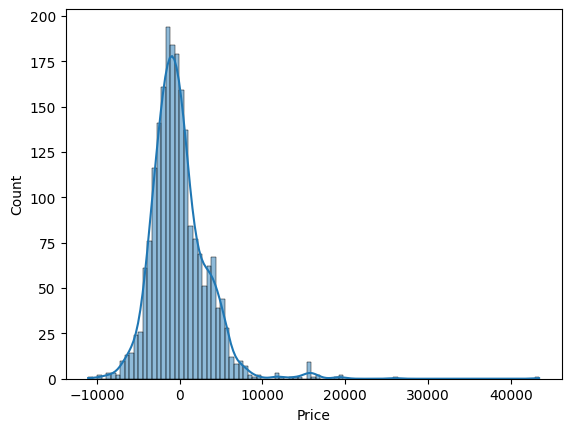

In [206]:
predict(LinearRegression())

Model is: KNeighborsRegressor()
Training score: 0.8206547154928161
Testing Score: 0.6851077709269966
Predictions are: [19466.4  4040.   4274.  ... 10684.2  6505.6 12822.4]


MAE:1542.9226946966078
MSE:6565590.005427616
RMSE:2562.340727816583


r2 score is: 0.6851077709269966
Adjusted_r2 score is: 0.6806812684339685


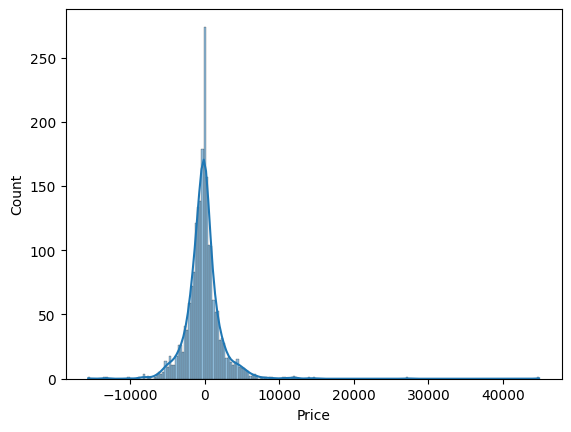

In [207]:
predict(KNeighborsRegressor(n_neighbors=5))

Model is: DecisionTreeRegressor()
Training score: 0.990472502923387
Testing Score: 0.7640947403322209
Predictions are: [14815.  3873.  4148. ... 10262.  6795. 13377.]


MAE:965.9333492594362
MSE:4918689.86307533
RMSE:2217.811953948154


r2 score is: 0.7640947403322209
Adjusted_r2 score is: 0.7607785733276811


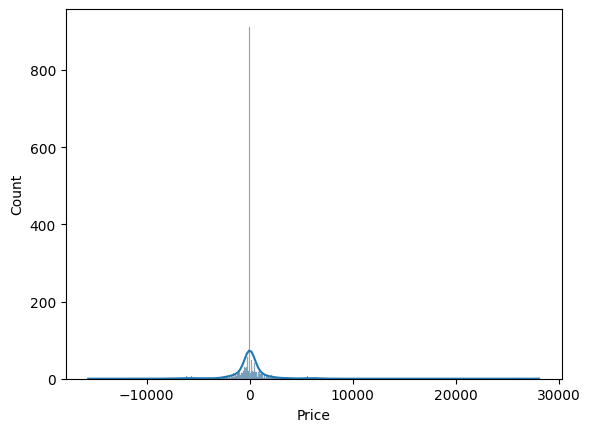

In [208]:
predict(DecisionTreeRegressor())

Model is: GradientBoostingRegressor()
Training score: 0.7475809915257038
Testing Score: 0.707117227700607
Predictions are: [14986.14056706  4141.32097061  5577.40187673 ...  9960.19988348
  9875.16561821 10025.71555967]


MAE:1703.8041506791892
MSE:6106686.74877022
RMSE:2471.1711289933405


r2 score is: 0.707117227700607
Adjusted_r2 score is: 0.7030001165049297


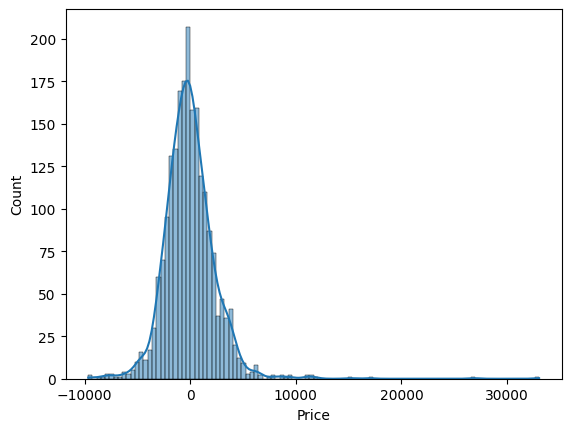

In [209]:
predict(GradientBoostingRegressor())

Model is: RandomForestRegressor()
Training score: 0.9747383894418225
Testing Score: 0.8377091985550771
Predictions are: [15069.66        3871.21        4323.25       ... 10234.07
  7367.58333333 12805.97666667]


MAE:868.6270626900705
MSE:3383808.0637188237
RMSE:1839.5129963440932


r2 score is: 0.8377091985550771
Adjusted_r2 score is: 0.835427844584208


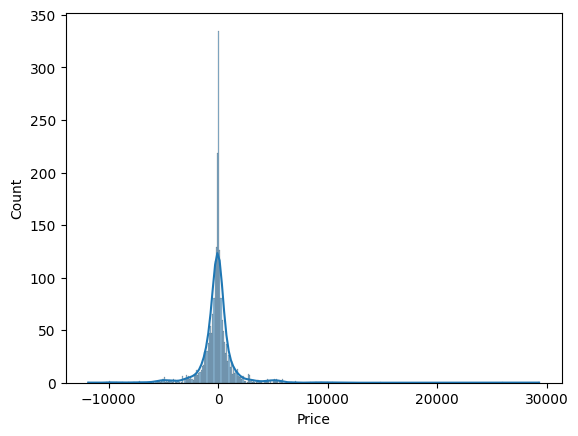

In [210]:
predict(RandomForestRegressor())

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Training score: 0.9506964087486267
Testing Score: 0.8463195562362671
Predictions are: [14922.512  3949.168  4043.947 ... 10076.561  8286.78  12181.225]


MAE:963.2515869140625
MSE:3204280.25
RMSE:1790.05034845392


r2 score is: 0.8463195562362

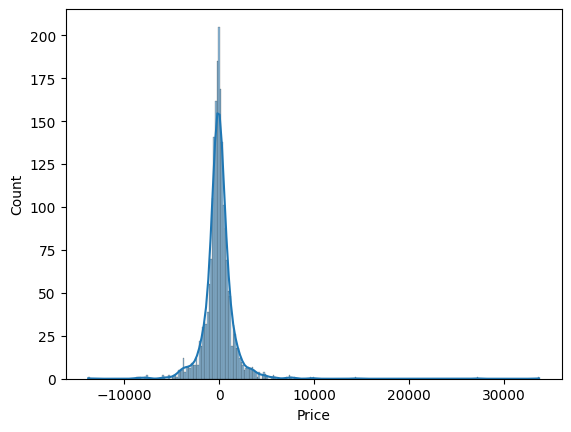

In [211]:
predict(XGBRegressor())

In [212]:
from sklearn.model_selection import RandomizedSearchCV

In [215]:
rf=RandomForestRegressor()

rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(x_train_scaled,y_train)

rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 220,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 25}

In [217]:
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor(
  n_estimators=220,
  min_samples_split = 3,
  min_samples_leaf = 2,
  max_features = 'sqrt',
  max_depth = 25 )
model_RFR.fit(x_train_scaled, y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=3, n_estimators=220)

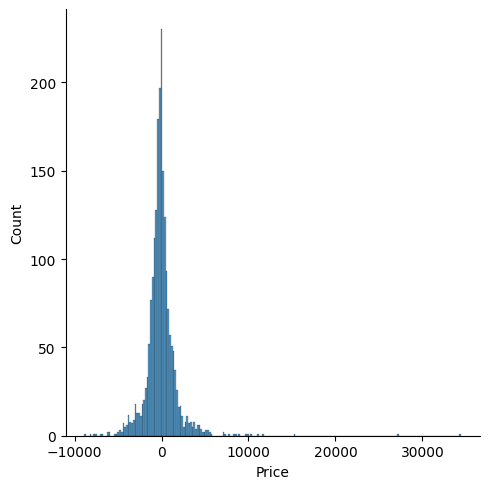

In [218]:
prediction = rf_random.predict(x_test_scaled)
sns.displot(y_test-prediction)
plt.show()

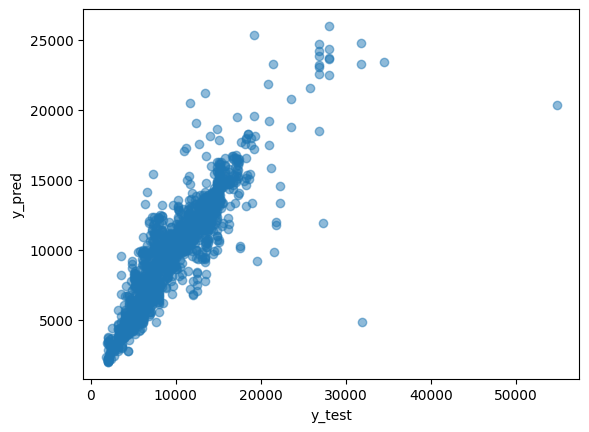

In [219]:
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [220]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators' : [100, 200, 500,1000],
    'learning_rate' : [0.01, 0.1, 0.5, 1.0],
    'max_depth' : [3,5,9,11],
    'min_samples_split' : [2,4,8,10],
    'min_samples_leaf' : [1,2,4,8],
    'subsample' : [0.8, 0.9, 1.0,2.0]
}

In [221]:
gbr = GradientBoostingRegressor()
model_gbr = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_grid,
    n_iter=100,
    cv=4,
    verbose=2,
    random_state = 42,
    n_jobs=-1,
)

In [223]:
model_gbr.fit(x_train_scaled,y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'max_depth': [3, 5, 9, 11],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'subsample': [0.8, 0.9, 1.0, 2.0]},
                   random_state=42, verbose=2)

In [224]:
model_gbr.best_params_

{'subsample': 0.9,
 'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 9,
 'learning_rate': 0.01}

In [225]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(subsample = 0.9,n_estimators = 1000, min_samples_split = 4,min_samples_leaf = 2,learning_rate = 0.1,max_depth = 9)
gbr_model.fit(x_train_scaled, y_train)

GradientBoostingRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=4,
                          n_estimators=1000, subsample=0.9)

In [226]:
y_prediction=gbr_model.predict(x_test_scaled)

In [227]:
y_prediction

array([15669.15933843,  3930.40959771,  4120.14993263, ...,
       10496.1494741 ,  6643.9379526 , 13176.25913384])

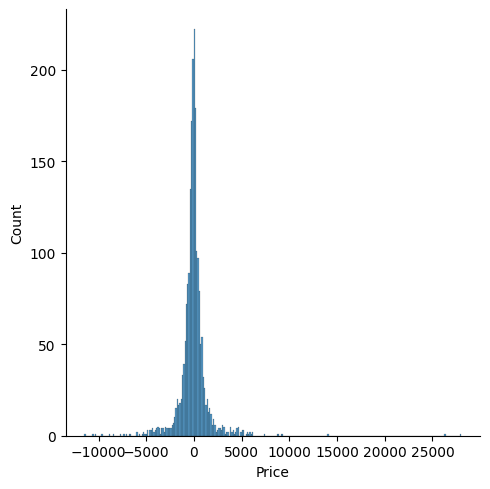

In [228]:
predict=model_gbr.predict(x_test_scaled)
sns.displot(y_test-predict)
plt.show()

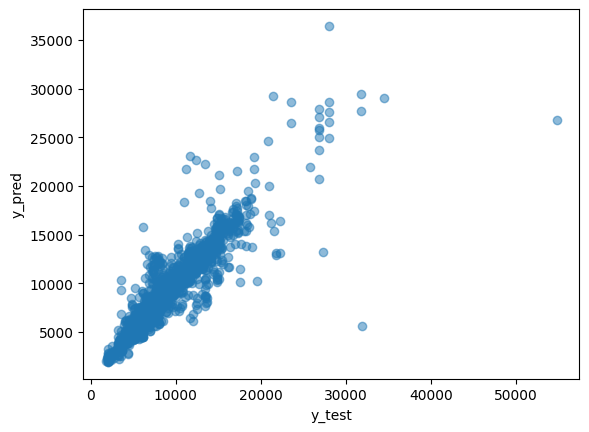

In [229]:
plt.scatter(y_test, predict, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [230]:
r2_score(y_test,y_prediction)

0.8226689135482295

In [231]:
def result(models):
    results = []
    for model in models:
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)

        r2 = r2_score(y_test, y_pred)

        results.append({
            'Model': model.__class__.__name__,
            'R²': r2,
        })

    return pd.DataFrame(results)

models = models=[LinearRegression(), KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),
                 GradientBoostingRegressor(),XGBRegressor()]
results_df = result(models)
print(results_df)

                       Model        R²
0           LinearRegression  0.428617
1        KNeighborsRegressor  0.685108
2      DecisionTreeRegressor  0.762608
3      RandomForestRegressor  0.837429
4  GradientBoostingRegressor  0.707117
5               XGBRegressor  0.846320


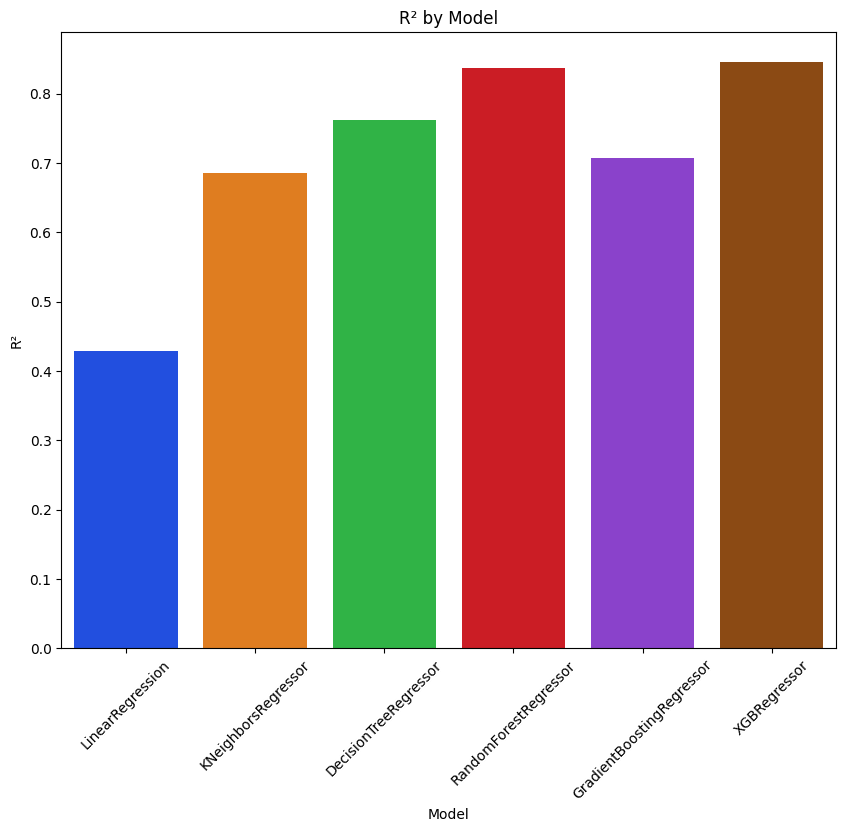

In [232]:
plt.figure(figsize=(10,8))
sns.barplot(x="Model",y="R²",data=results_df,palette='bright')
plt.xticks(rotation=45)
plt.title("R² by Model")
plt.show()